<a href="https://colab.research.google.com/github/halldm2000/NOAA-AI-2020-TUTORIAL/blob/master/taylor_series_pytorch_v0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Define functions to generate and plot the data**

In [40]:
import torch
!mkdir -p images

def generate_data(order,  noise=0.2, rand_seed= 1):

  torch.manual_seed(rand_seed) 
  x = torch.linspace(-1,1,100)                   
  y = sum(torch.rand(1)*x**(i) for i in range(order) ) + noise * torch.randn_like(x)
  return x,y

def plot_data(x,y,pred,i,loss):

  plt.figure(figsize=(5,4),dpi=1.5*72)
  plt.plot(x,y,'.')
  plt.plot(x,pred, linewidth=3)
  plt.title(f"epoch={i}, loss = {loss:.4f}")
  plt.ylim(-0.5,3.5)
  plt.savefig(f'./images/img_{i:03d}',bbox_inches='tight');
  plt.show()


**Fit Model to Data**

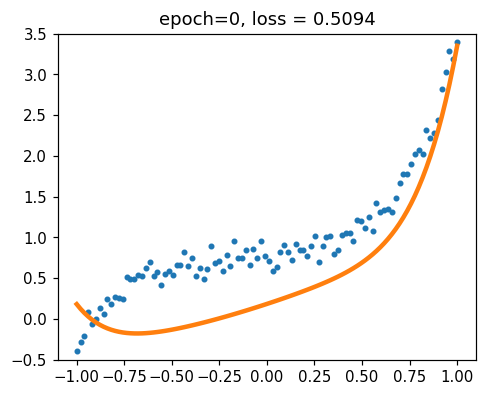

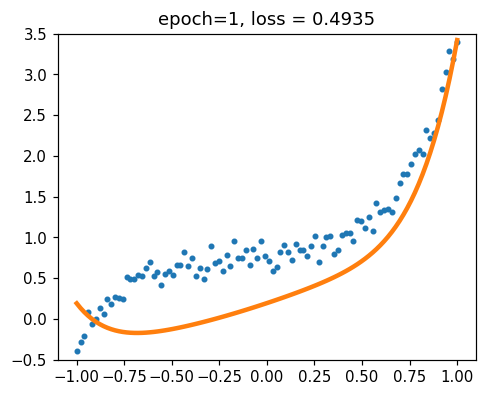

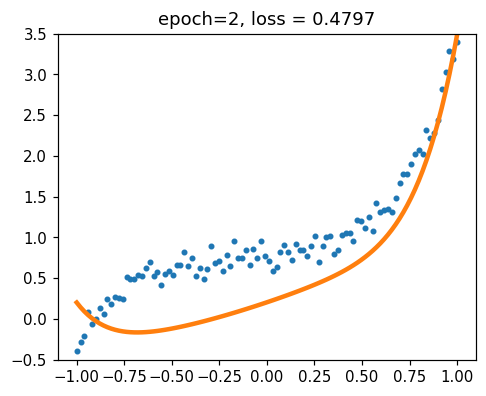

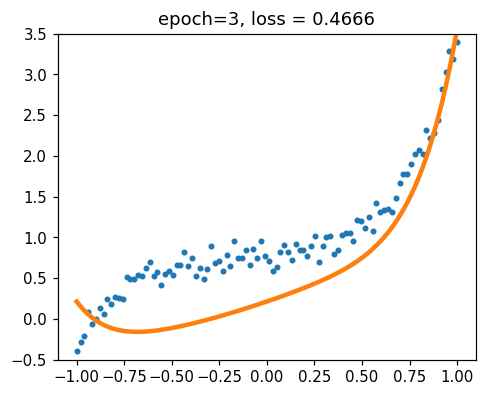

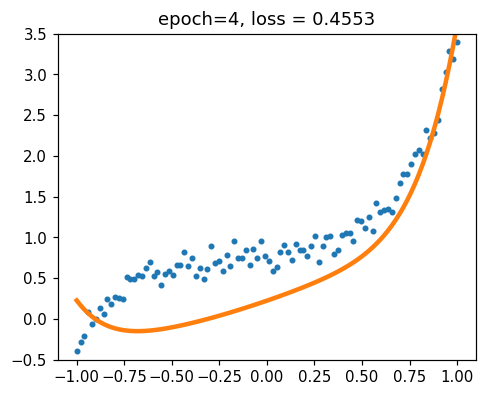

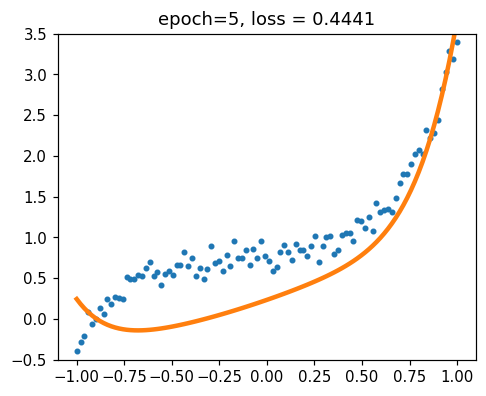

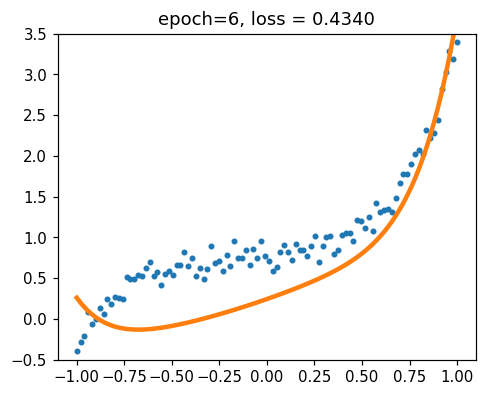

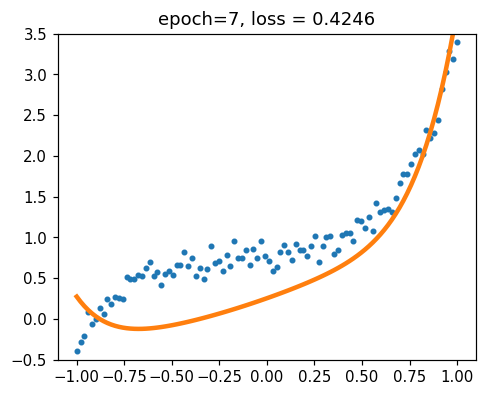

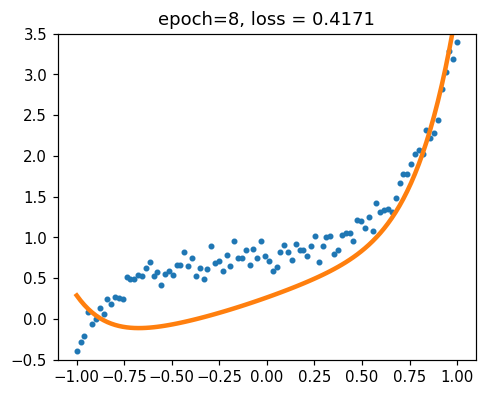

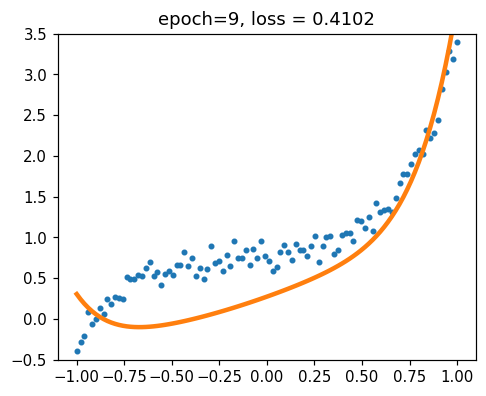

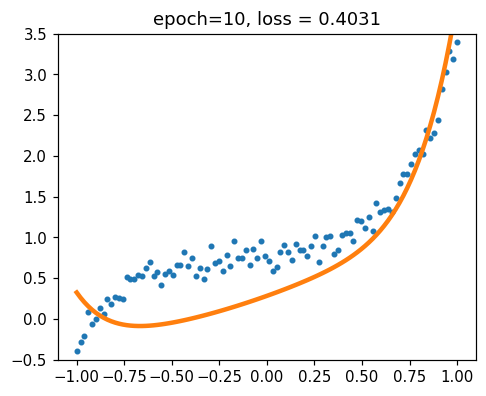

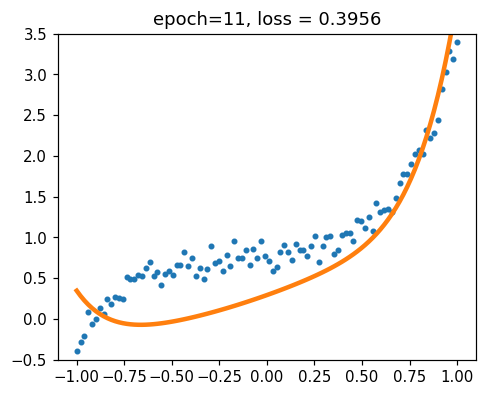

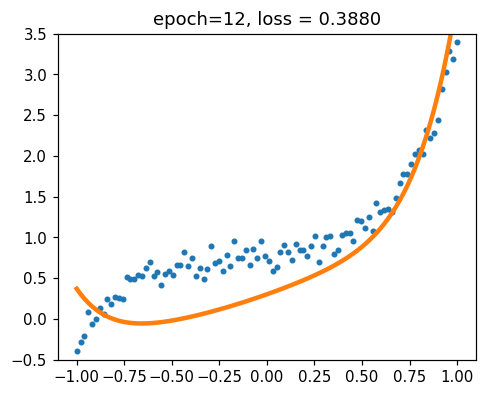

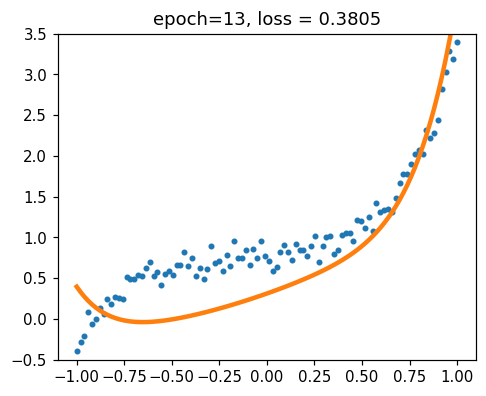

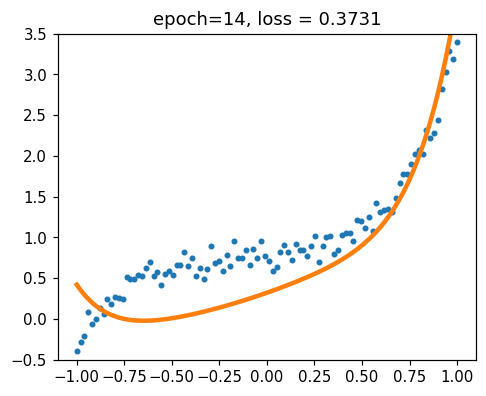

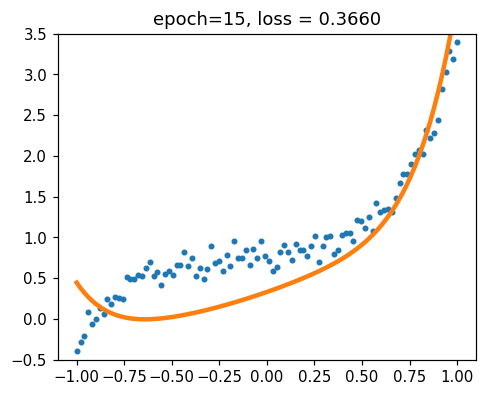

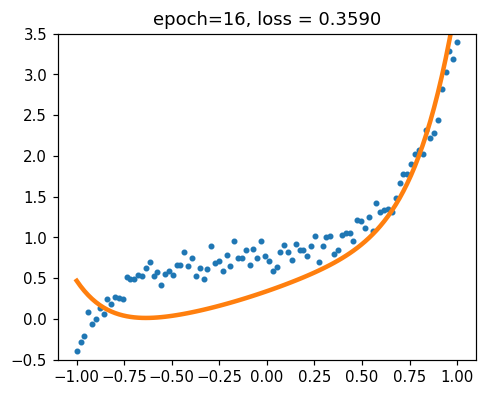

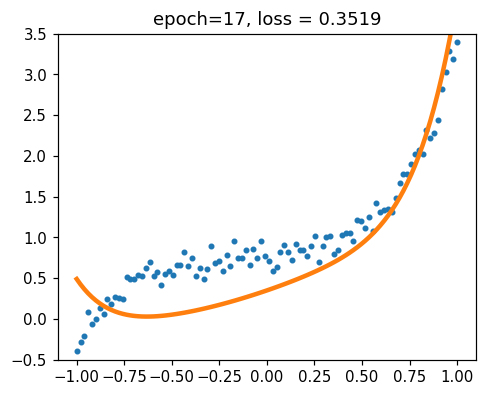

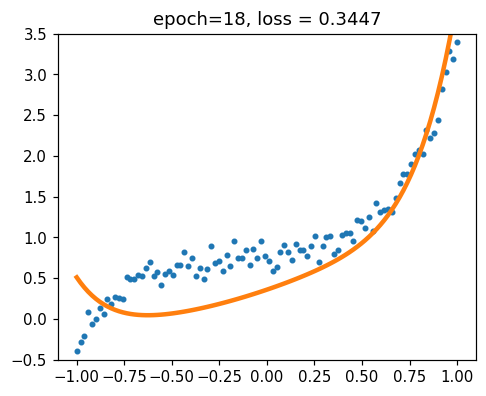

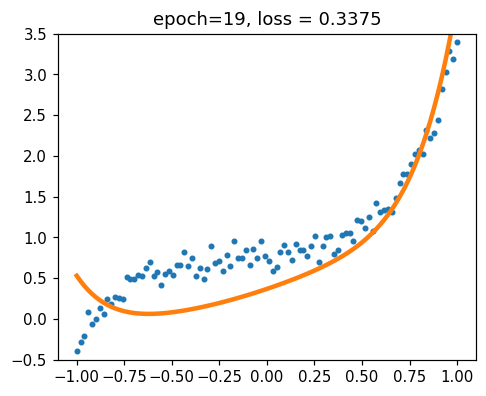

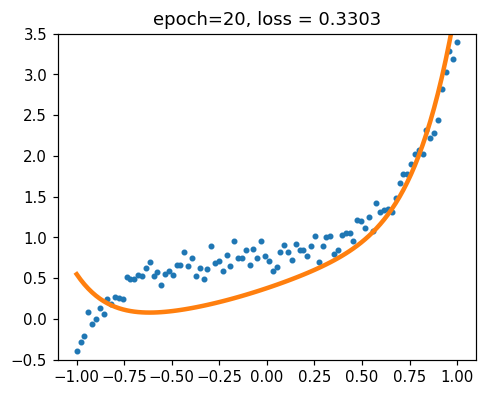

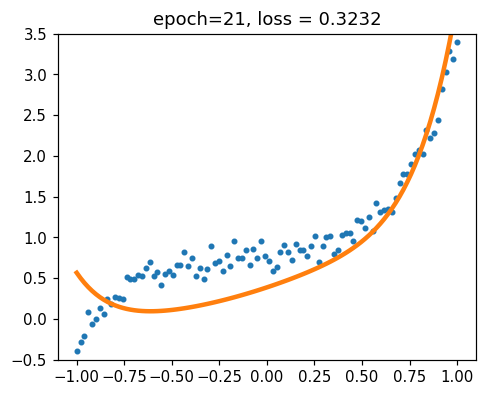

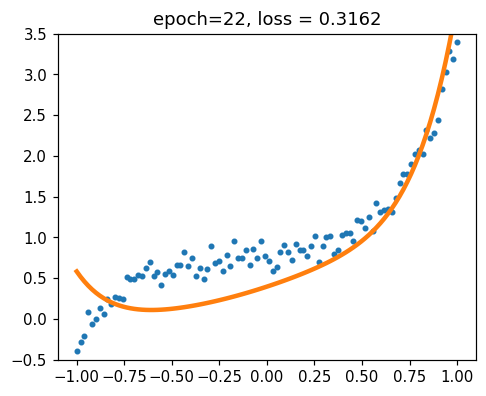

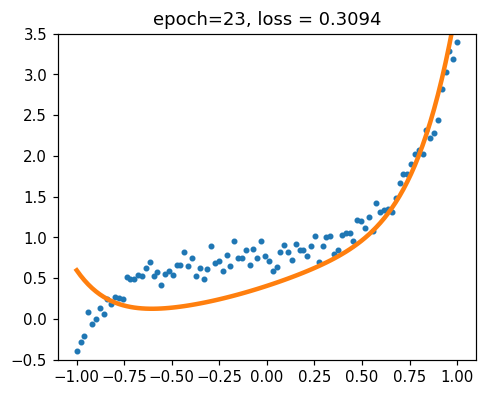

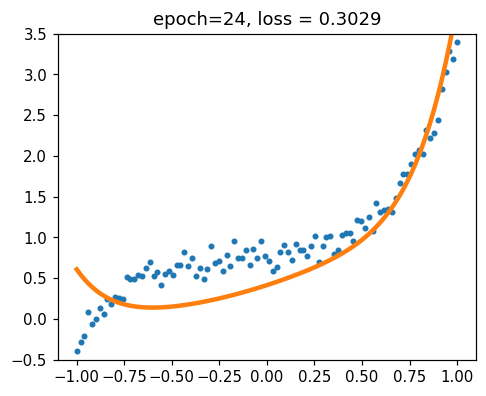

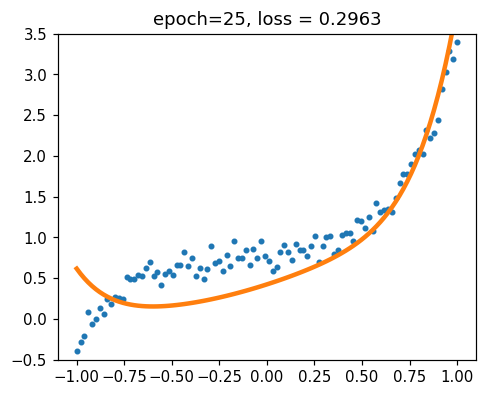

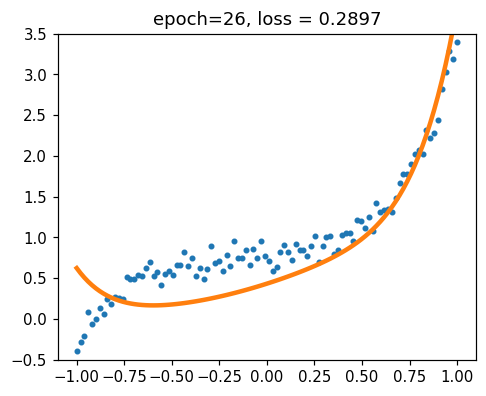

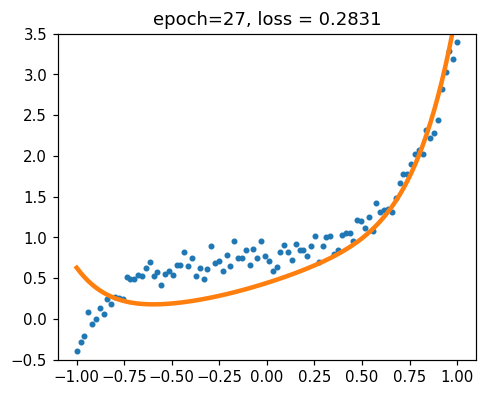

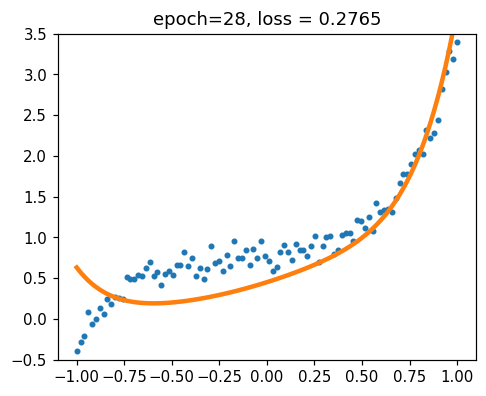

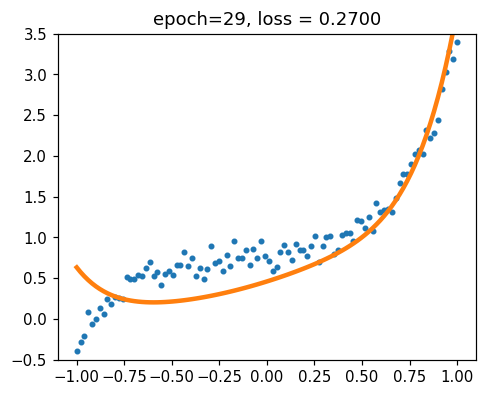

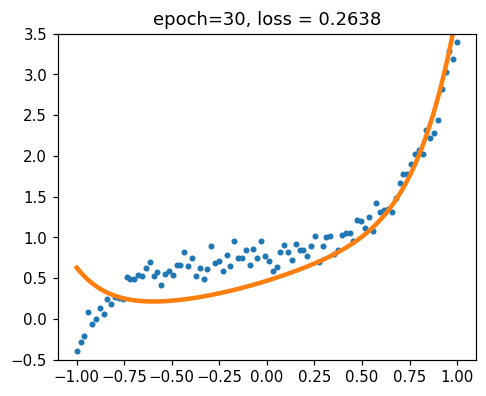

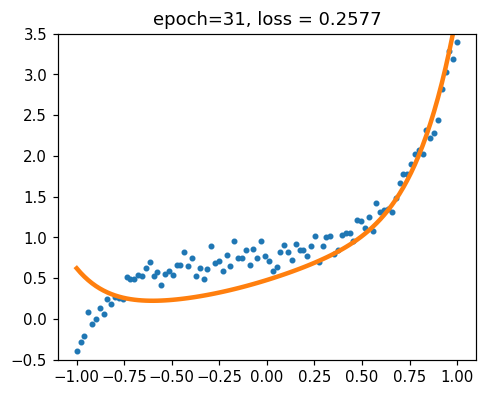

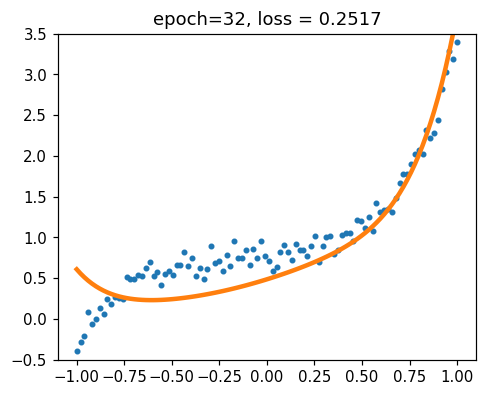

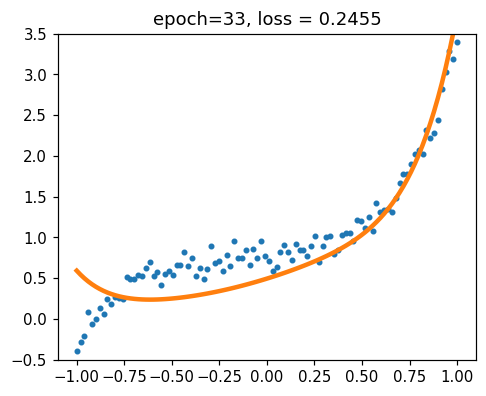

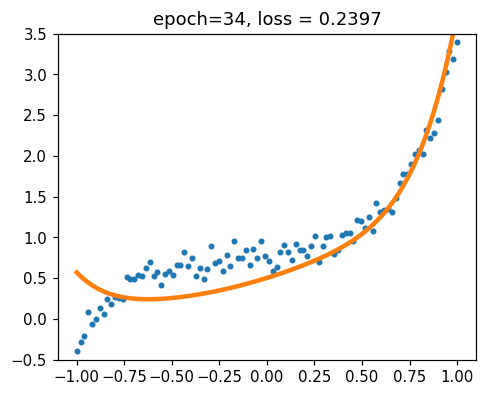

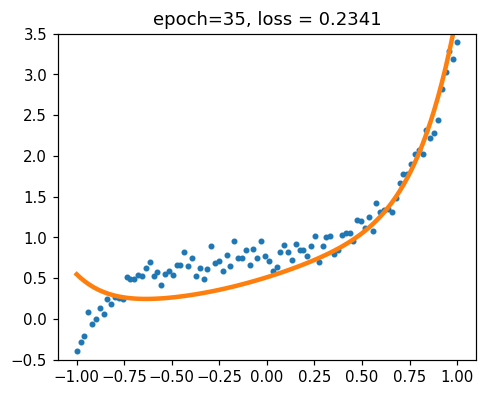

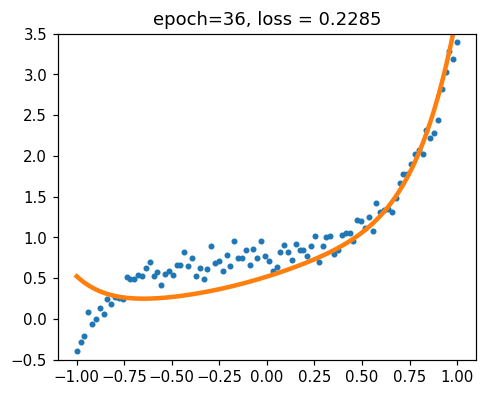

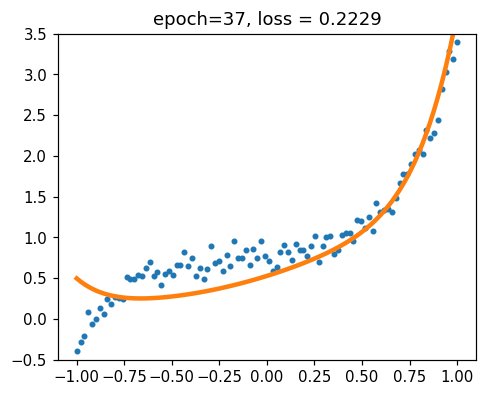

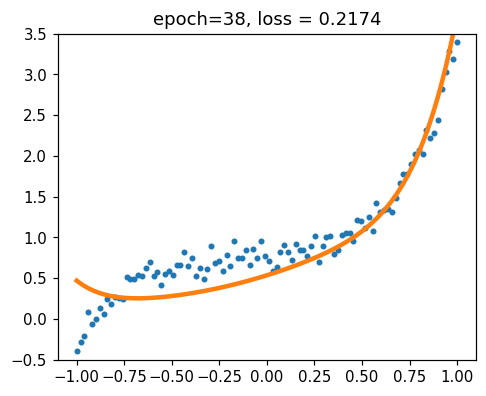

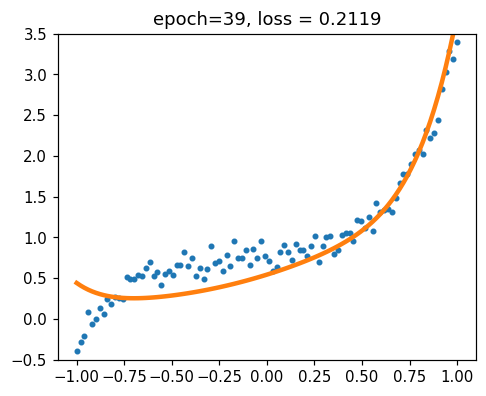

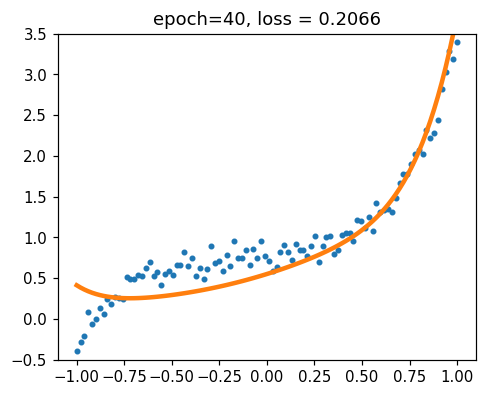

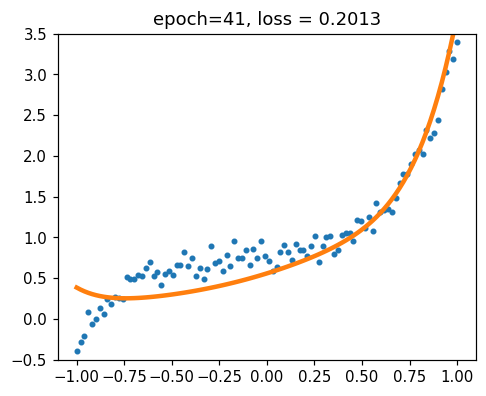

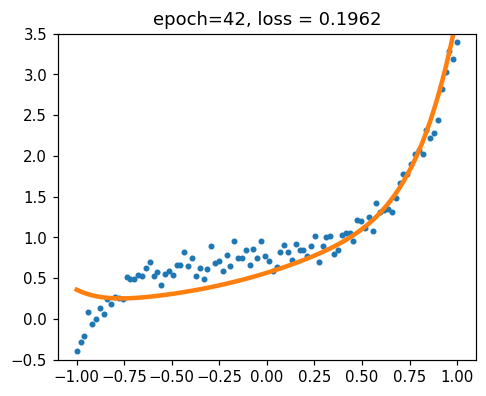

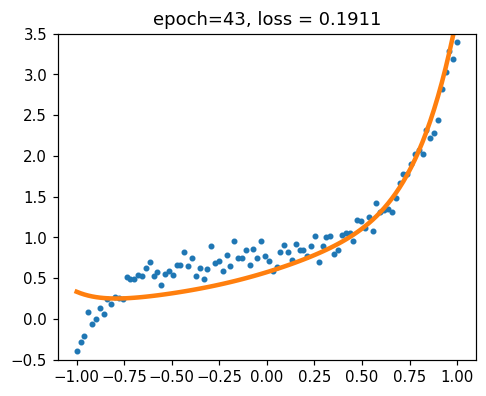

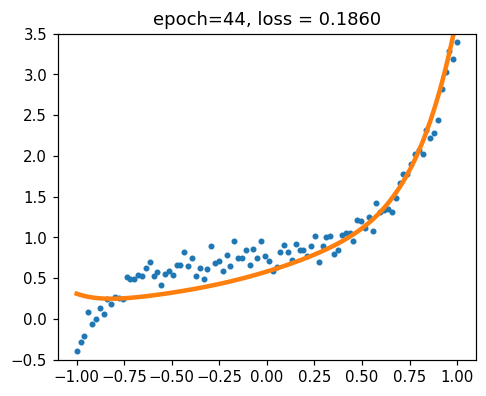

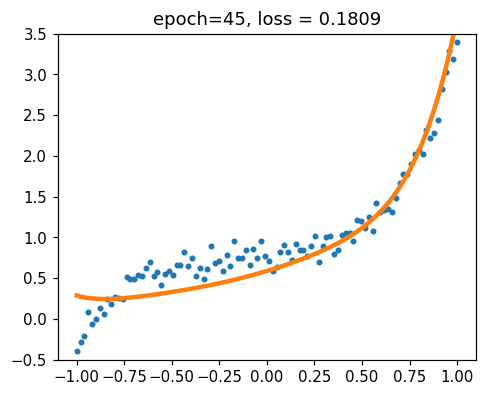

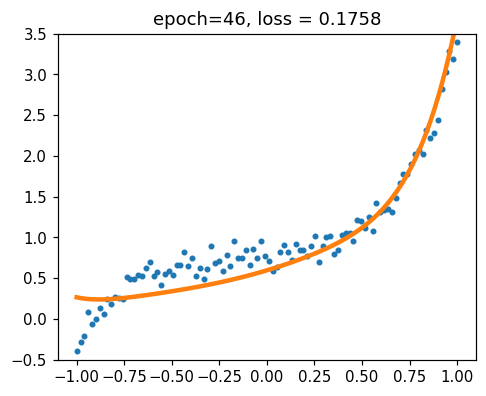

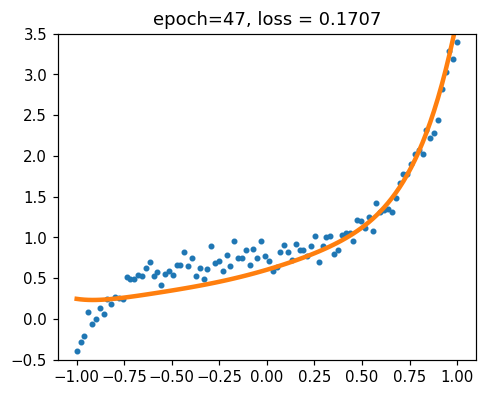

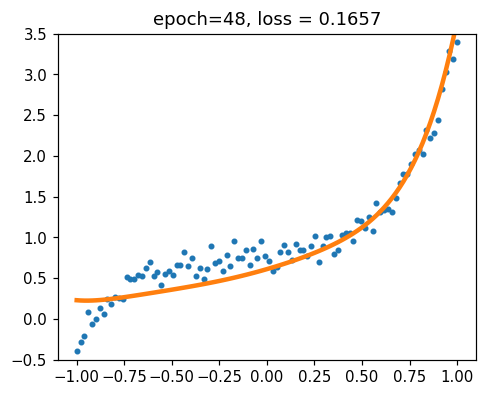

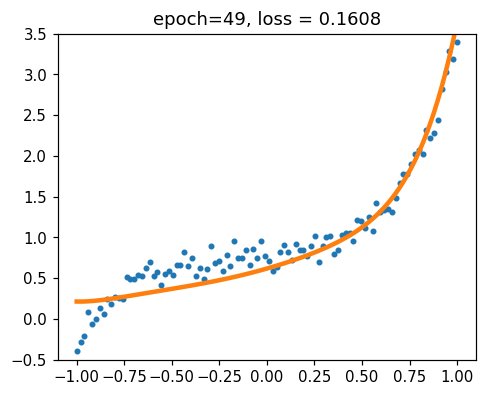

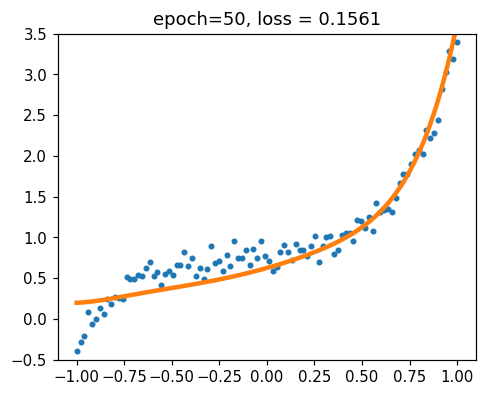

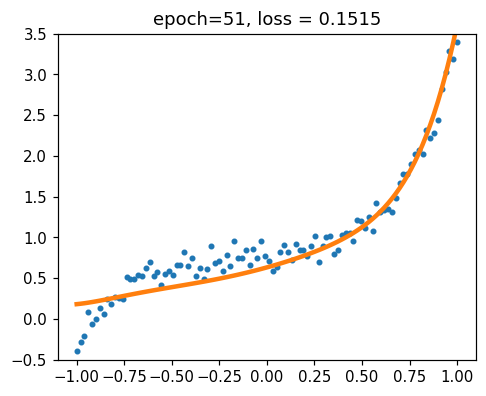

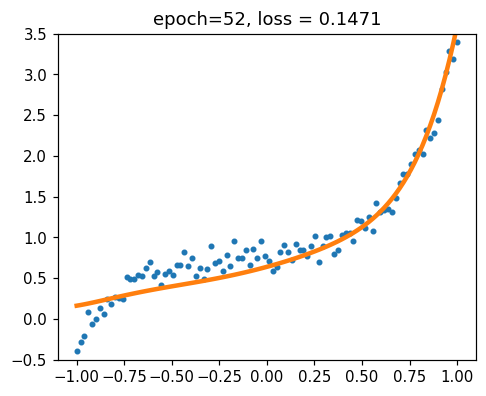

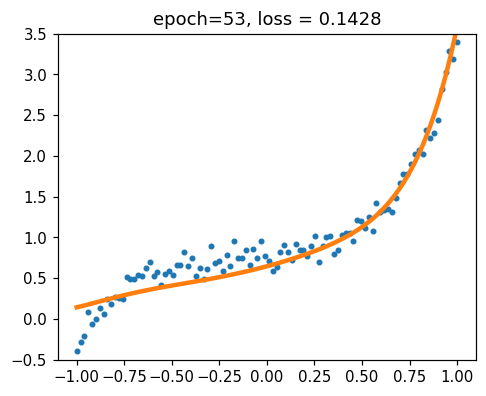

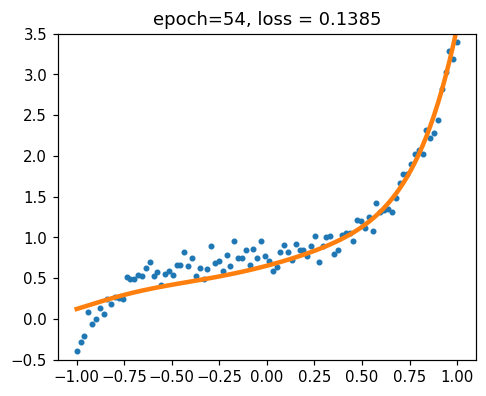

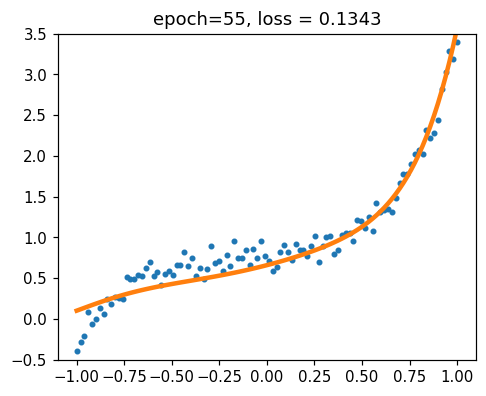

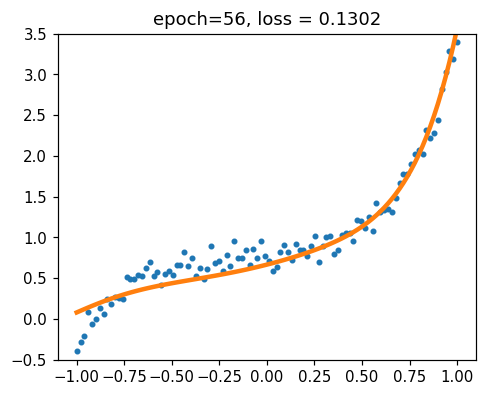

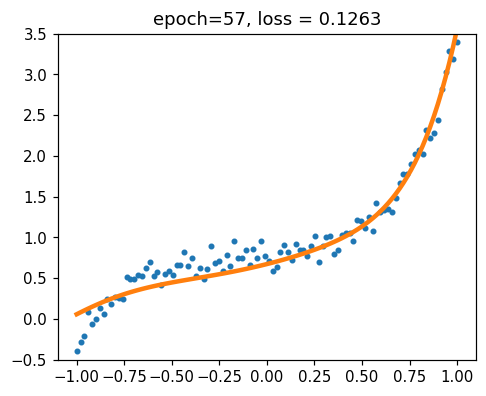

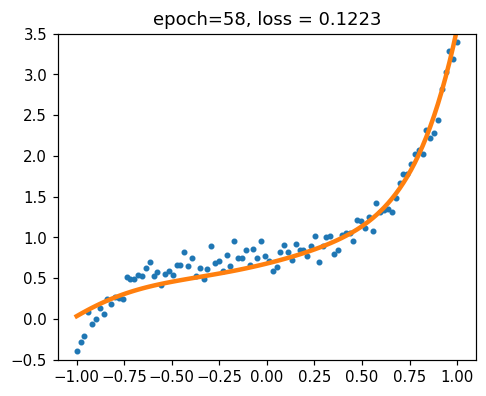

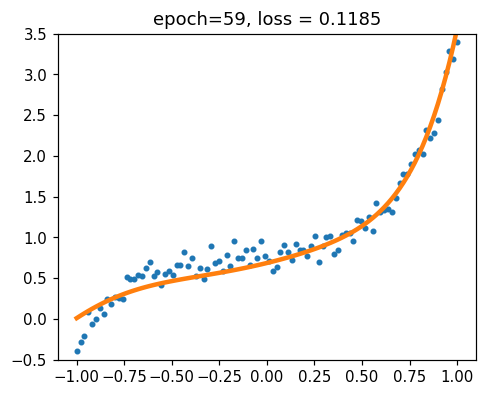

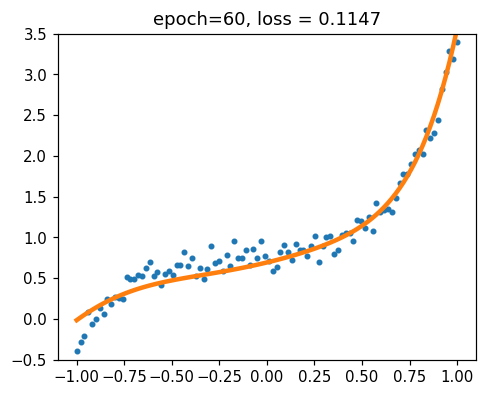

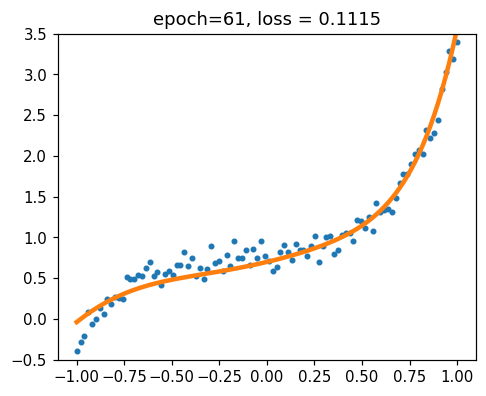

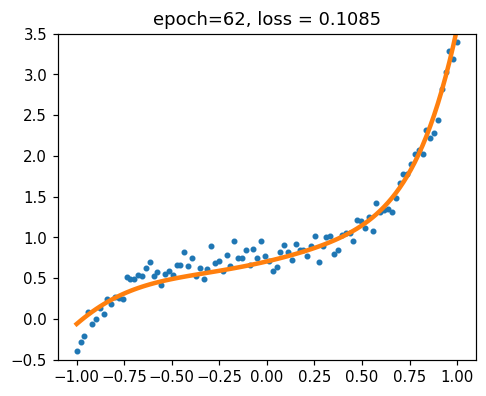

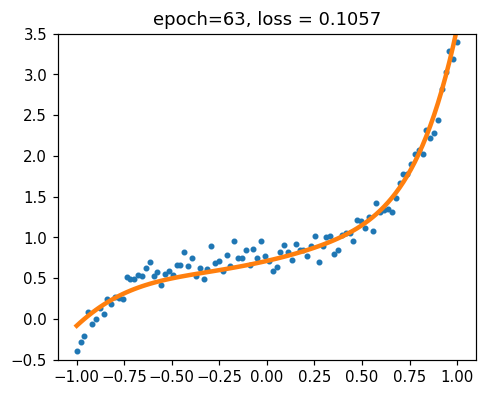

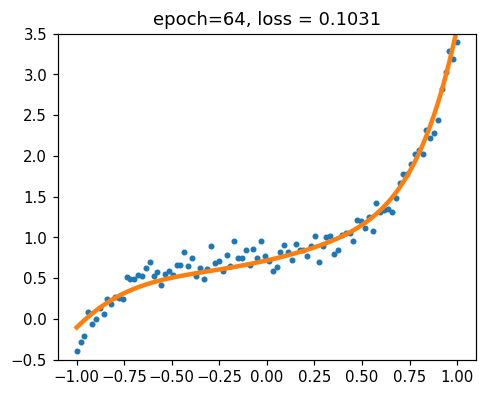

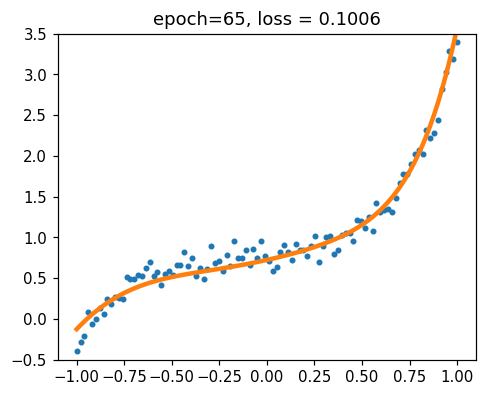

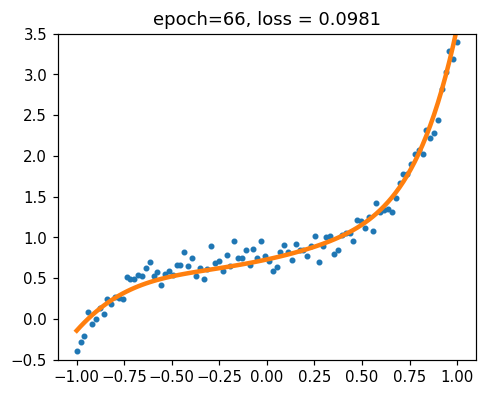

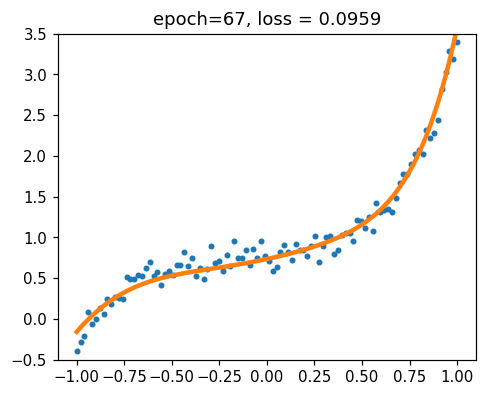

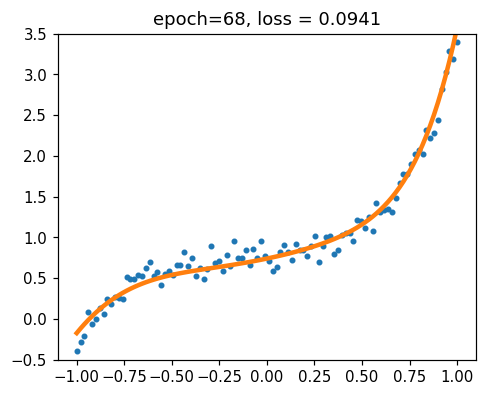

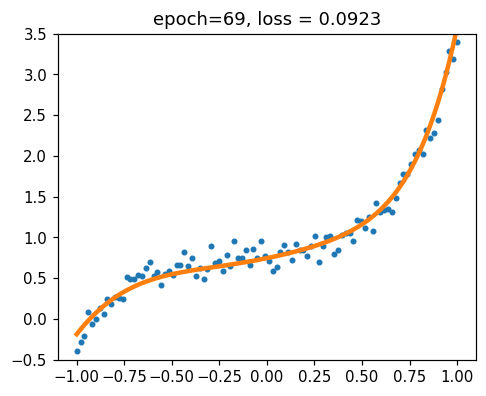

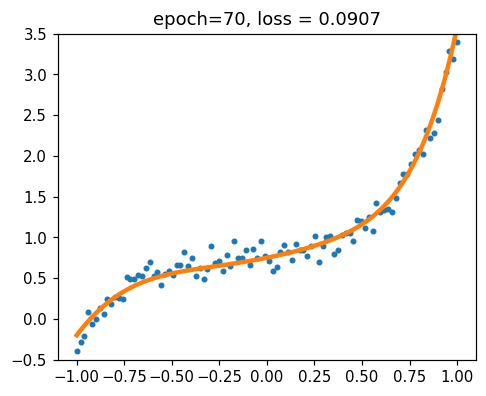

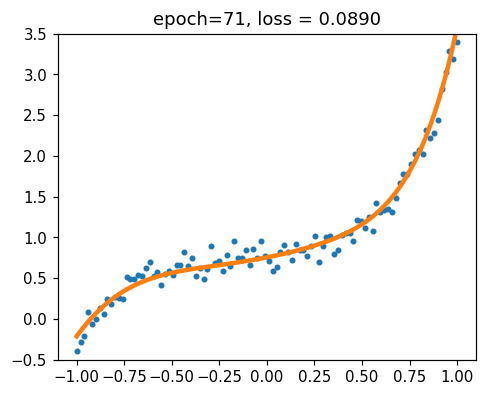

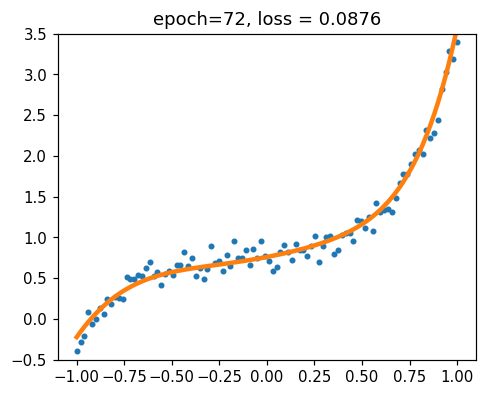

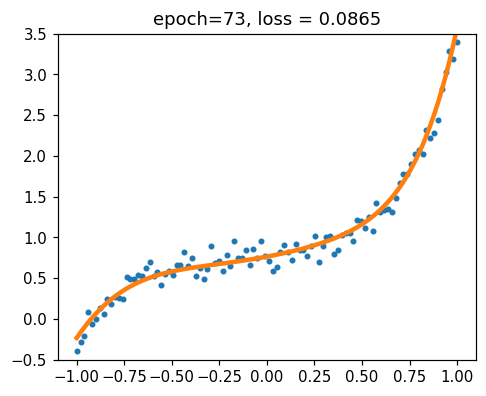

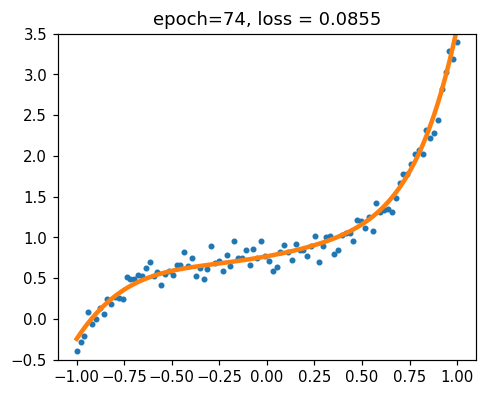

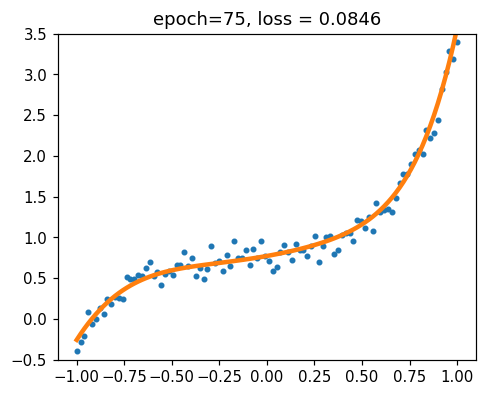

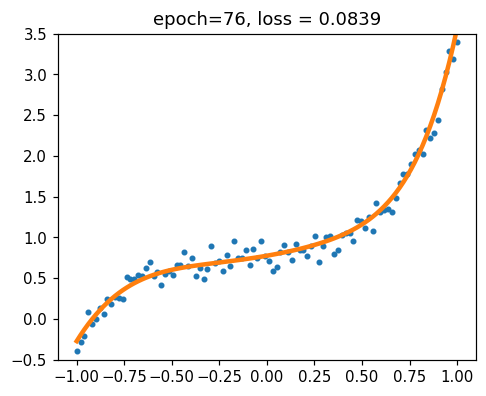

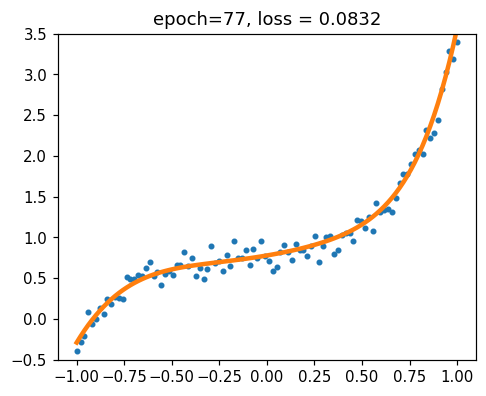

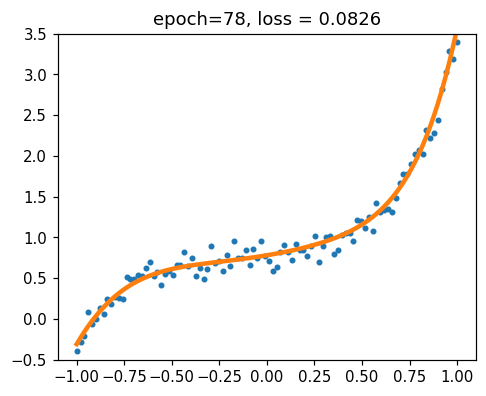

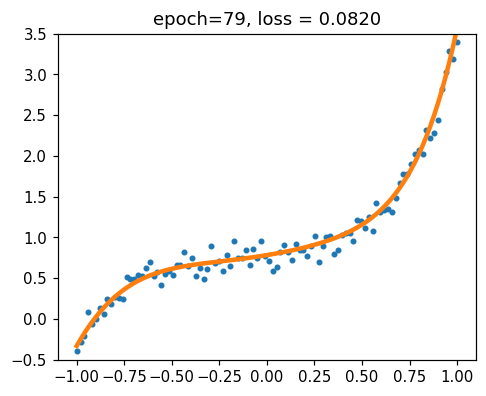

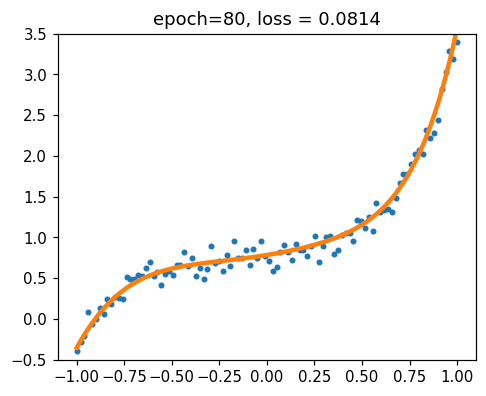

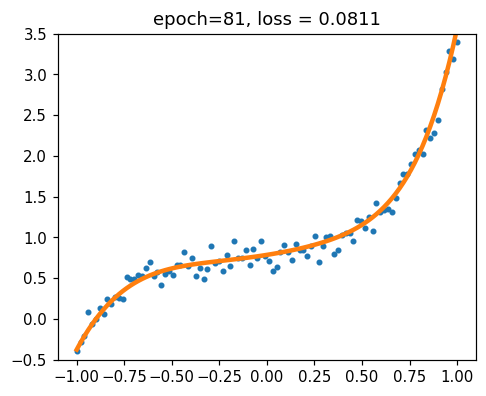

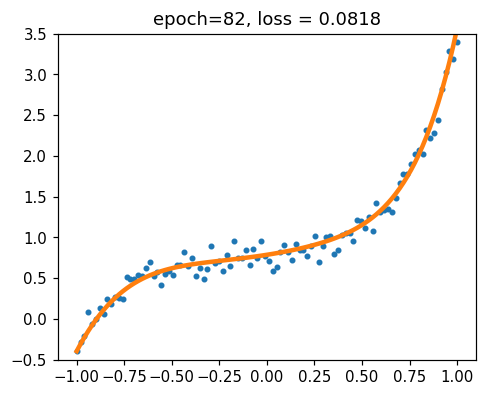

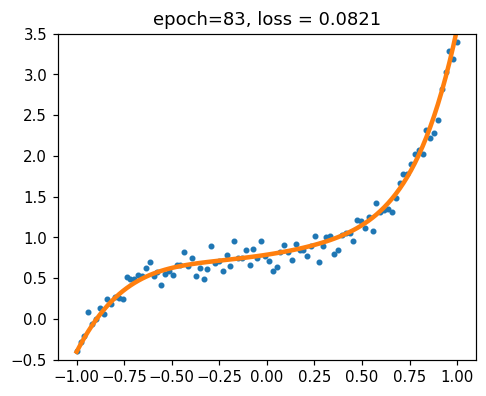

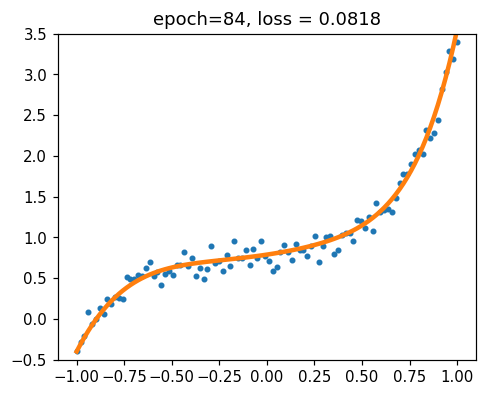

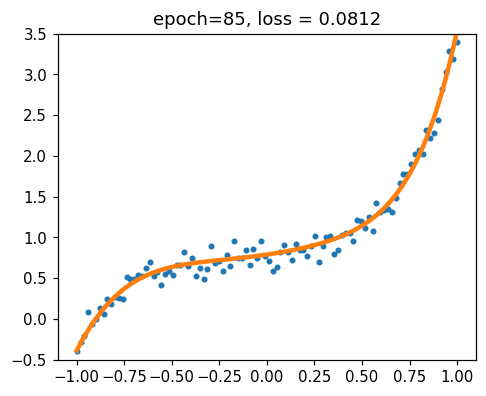

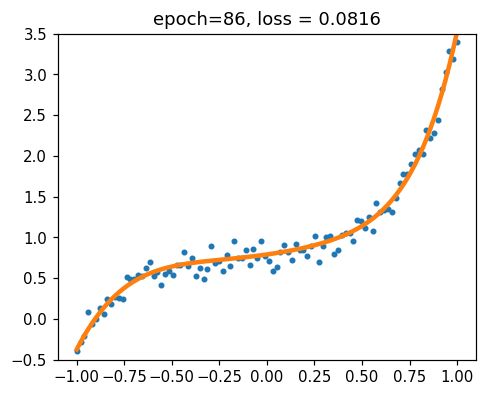

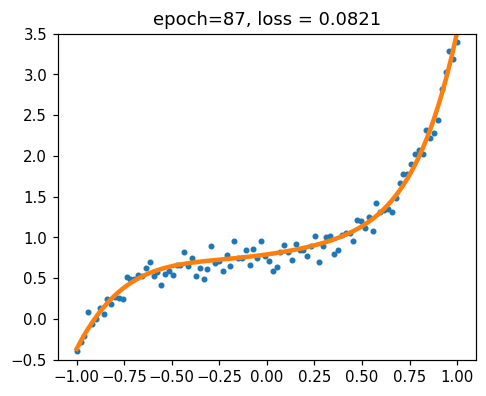

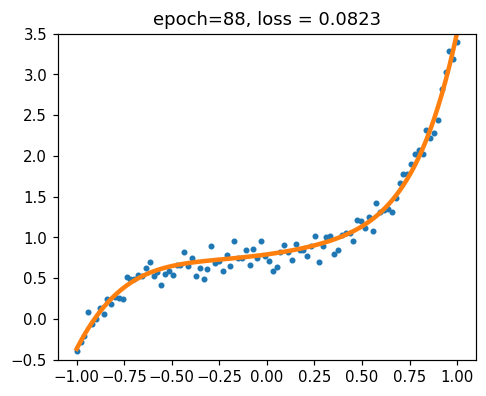

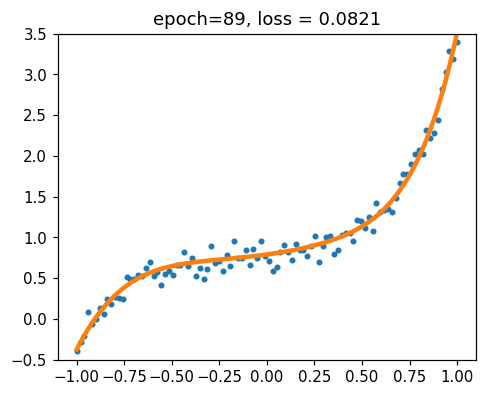

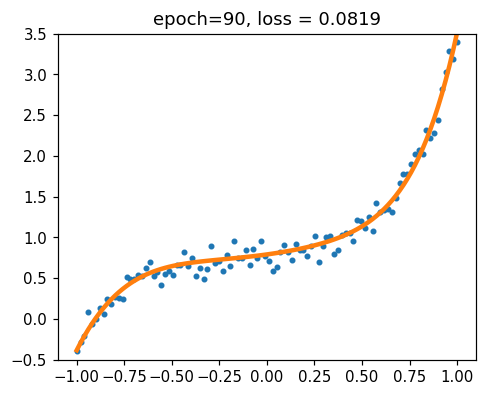

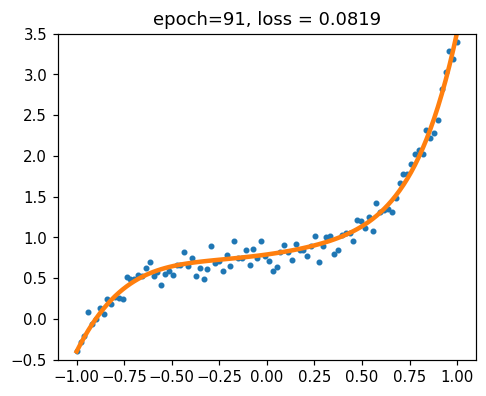

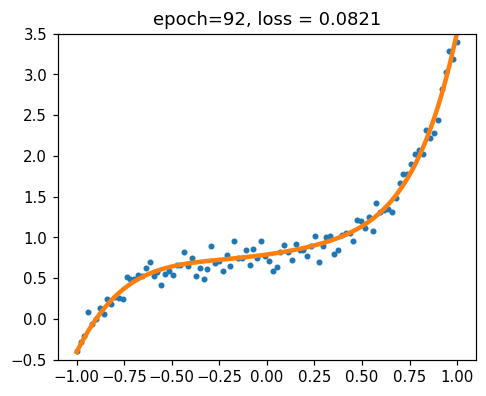

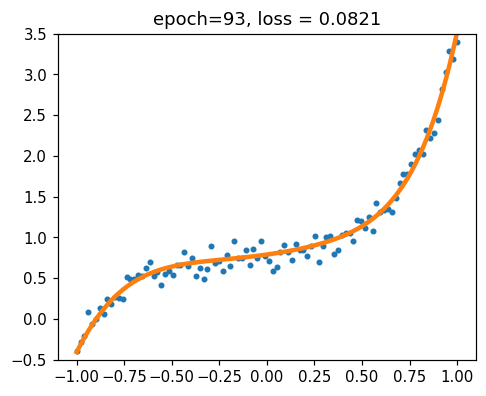

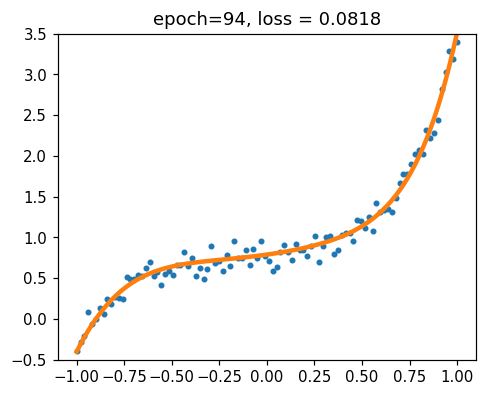

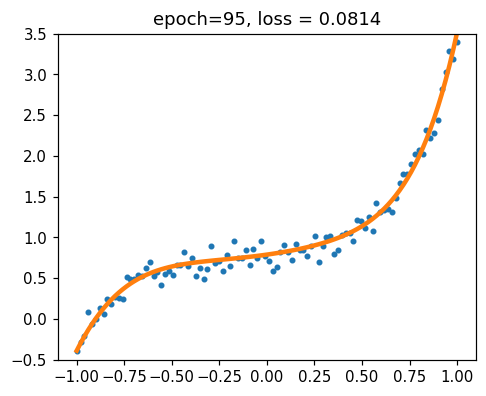

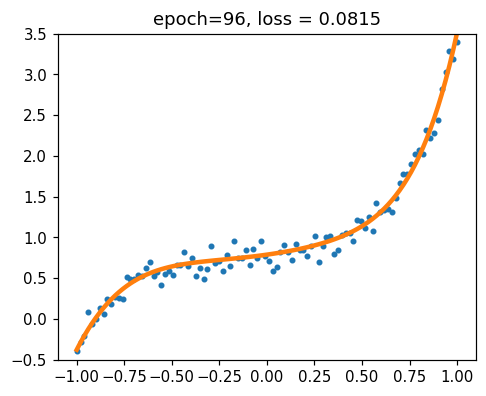

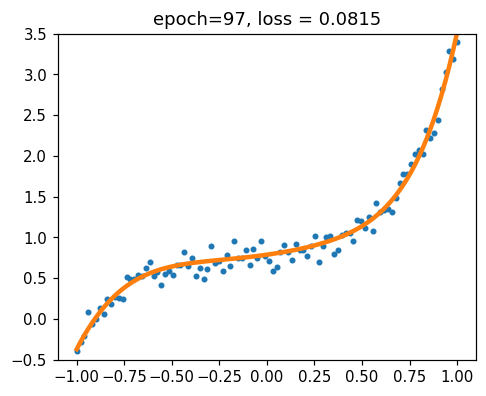

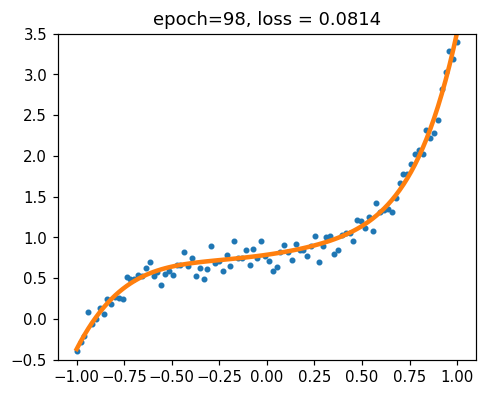

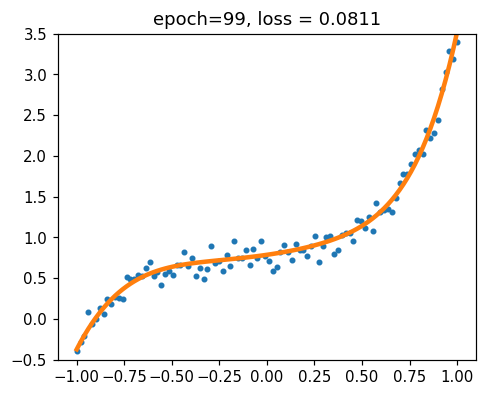

In [41]:
import torch
import matplotlib.pyplot as plt

# DATA
x,y = generate_data(order = 7, noise=0.1, rand_seed=1)

# MODEL
w = torch.rand(7, requires_grad = True)                  
def model(x): return sum(w[i]*x**i for i in range(len(w))) 

# OPTIMIZER AND LOSS
optimizer = torch.optim.Adam(params = [w], lr=1e-2)
loss_fcn  = torch.nn.L1Loss()

# TRAIN
for epoch in range(100):

  optimizer.zero_grad()
  prediction = model(x)
  loss = loss_fcn(prediction,y)
  loss.backward()
  optimizer.step()

  with torch.no_grad():
    plot_data(x,y,prediction,epoch,loss.item())


**Convert figures into a movie**

In [42]:
!ffmpeg -loglevel warning -i ./images/img_%03d.png -vf scale=1280:-2 -pix_fmt yuv420p -y out.mp4

**Embed the movie in the notebook**

In [43]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('out.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
<video width=800 controls><source src="%s" type="video/mp4"></video>
""" % data_url)

**Remove images files**

In [ ]:
!rm ./images/img_*.png